### Computer Vision and Convolutional Neural Networks in Tensorflow

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

In [ ]:
!ls ../datasets/pizza_steak/

In [ ]:
!ls ../datasets/pizza_steak/train/pizza

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('../datasets/pizza_steak'):
    print(f"There are { len(dirnames) } directories and { len(filenames) } images in '{ dirpath }'")

In [ ]:
# Another way to find the nunmber of files
len(os.listdir('../datasets/pizza_steak/train/steak'))

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    #setup the target directory
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"SHAPE: {img.shape}")
    
    return img

img = view_random_image(target_dir="../datasets/pizza_steak/train/", target_class="steak")



In [ ]:
import tensorflow as tf

tf.constant(img)

In [ ]:
img.shape

In [ ]:
img = img/255.

### Normalizing image

In [49]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)


train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "../datasets/pizza_steak/train"
test_dir = "../datasets/pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42
                                               )

# Build a CNN model(same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

47/47 [==============================] - 8s 170ms/step - loss: 0.4296 - accuracy: 0.8053 - val_loss: 0.3393 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 8s 164ms/step - loss: 0.4274 - accuracy: 0.8220 - val_loss: 0.3806 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 8s 164ms/step - loss: 0.3860 - accuracy: 0.8387 - val_loss: 0.3234 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 7s 152ms/step - loss: 0.3336 - accuracy: 0.8553 - val_loss: 0.3398 - val_accuracy: 0.8420


In [50]:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_23 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_25 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

### Using the same model as before

In [51]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 158ms/step - loss: 0.7004 - accuracy: 0.4953 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 163ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 169ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 156ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 167ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


SHAPE: (512, 512, 3)
SHAPE: (382, 512, 3)


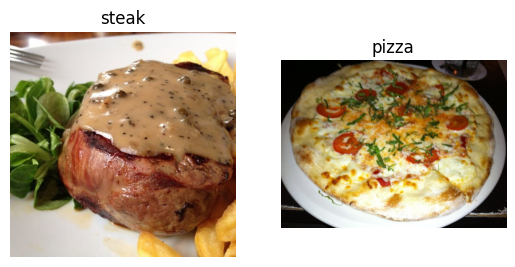

In [52]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(view_random_image(target_dir="../datasets/pizza_steak/train/", target_class="steak"))
plt.subplot(1, 2, 2)
plt.imshow(view_random_image(target_dir="../datasets/pizza_steak/train/", target_class="pizza"))

In [53]:
train_dir = "../datasets/pizza_steak/train/"
test_dir = "../datasets/pizza_steak/test/"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


train_data = train_datagen.flow_from_directory(directory=train_dir, target_size=(224, 224), class_mode="binary", batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir, target_size=(224, 224), class_mode="binary", batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [54]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [55]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    plt.plot(epochs, loss, label="training loss")
    plt.plot(epochs, val_loss, label="validation loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()


    plt.figure()
    plt.plot(epochs, accuracy, label="training accuracy")
    plt.plot(epochs, val_accuracy, label="validation accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

### New model

In [56]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_5.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history_5 = model_5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 174ms/step - loss: 0.6085 - accuracy: 0.6693 - val_loss: 0.5027 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4741 - accuracy: 0.7733 - val_loss: 0.3822 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4225 - accuracy: 0.8047 - val_loss: 0.3554 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.4001 - accuracy: 0.8180 - val_loss: 0.3267 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 8s 162ms/step - loss: 0.3773 - accuracy: 0.8407 - val_loss: 0.3478 - val_accuracy: 0.8560


In [57]:
model_5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 26, 26, 10)      

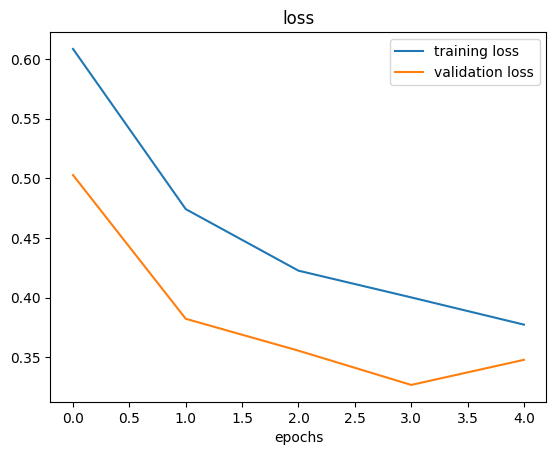

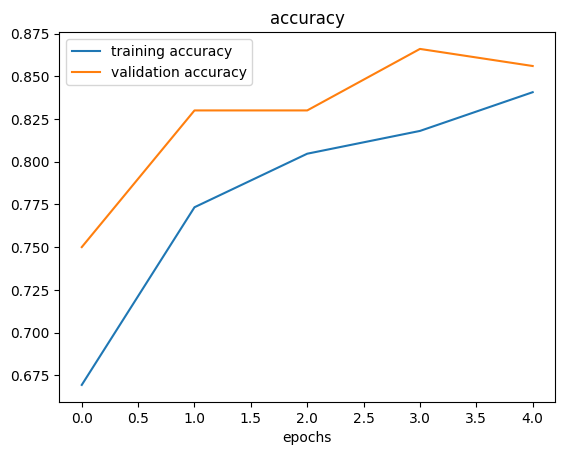

In [58]:
plot_loss_curves(history_5)

### Data augmentation

In [59]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255., rotation_range=0.2, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.3, horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir, target_size=(224, 224), class_mode="binary", batch_size=32, shuffle=False)
train_data = train_datagen.flow_from_directory(directory=train_dir, target_size=(224, 224), class_mode="binary", batch_size=32, shuffle=False)
test_data = test_datagen.flow_from_directory(directory=test_dir, target_size=(224, 224), class_mode="binary", batch_size=32)


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [60]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Image number: 22


(-0.5, 223.5, 223.5, -0.5)

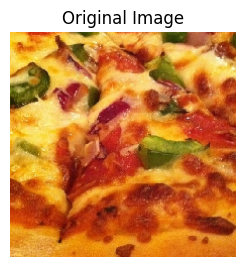

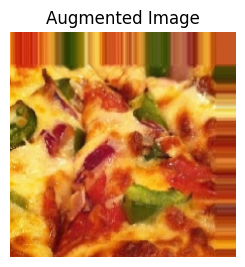

In [61]:
import random
random_number = random.randint(0, 32)
print(f"Image number: {random_number}")
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(images[random_number])
plt.axis(False)



plt.figure()
plt.subplot(1, 2, 2)
plt.title('Augmented Image')
plt.imshow(augmented_images[random_number])
plt.axis(False)

### Model to use augmented data

In [62]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented, steps_per_epoch=len(train_data_augmented), epochs=5, validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 57s 1s/step - loss: 0.7831 - accuracy: 0.4840 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 54s 1s/step - loss: 0.6930 - accuracy: 0.5613 - val_loss: 0.6724 - val_accuracy: 0.6080
Epoch 3/5
47/47 [==============================] - 55s 1s/step - loss: 0.6845 - accuracy: 0.5547 - val_loss: 0.6704 - val_accuracy: 0.5060
Epoch 4/5
47/47 [==============================] - 50s 1s/step - loss: 0.6972 - accuracy: 0.5180 - val_loss: 0.6350 - val_accuracy: 0.6060
Epoch 5/5
47/47 [==============================] - 50s 1s/step - loss: 0.6624 - accuracy: 0.6320 - val_loss: 0.5400 - val_accuracy: 0.7520


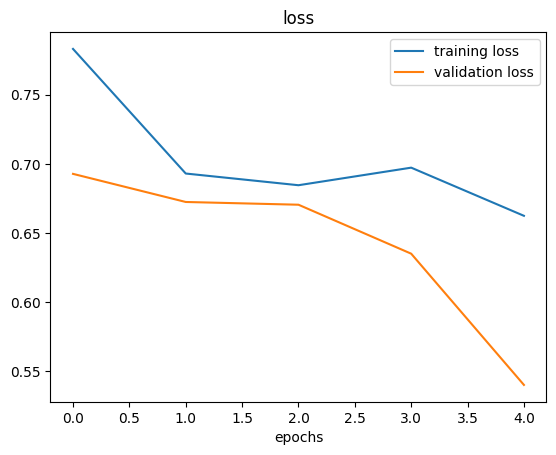

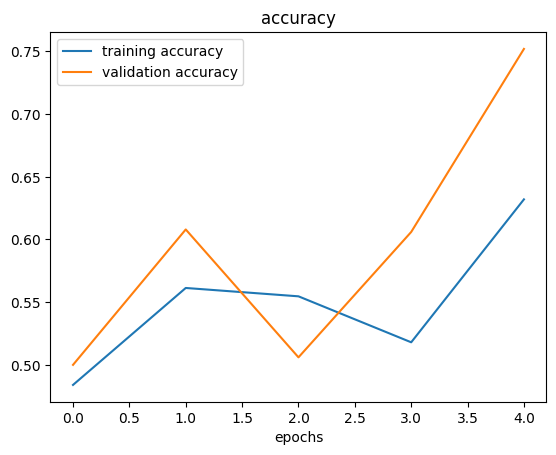

In [63]:
plot_loss_curves(history_6)

### Shuffling the data to get more accuracy

In [64]:


train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(directory=train_dir, target_size=(224, 224), class_mode="binary", batch_size=32)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_7.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_7 = model_7.fit(train_data_augmented_shuffled, steps_per_epoch=len(train_data_augmented_shuffled), epochs=5, validation_data=test_data, validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 54s 1s/step - loss: 0.6568 - accuracy: 0.5807 - val_loss: 0.6017 - val_accuracy: 0.6600
Epoch 2/5
47/47 [==============================] - 49s 1s/step - loss: 0.5928 - accuracy: 0.6927 - val_loss: 0.4857 - val_accuracy: 0.7640
Epoch 3/5
47/47 [==============================] - 50s 1s/step - loss: 0.5430 - accuracy: 0.7293 - val_loss: 0.4102 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 49s 1s/step - loss: 0.4985 - accuracy: 0.7573 - val_loss: 0.3595 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 50s 1s/step - loss: 0.4874 - accuracy: 0.7807 - val_loss: 0.3741 - val_accuracy: 0.8320


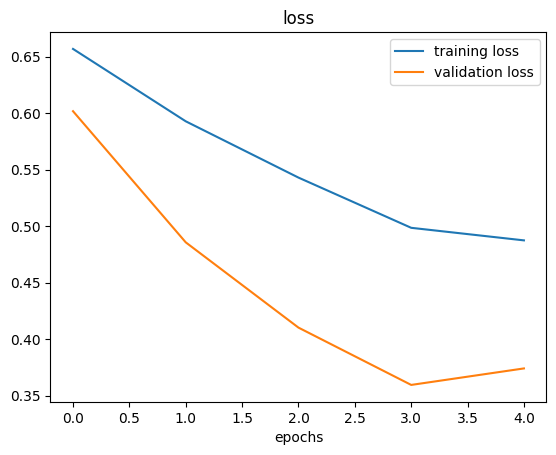

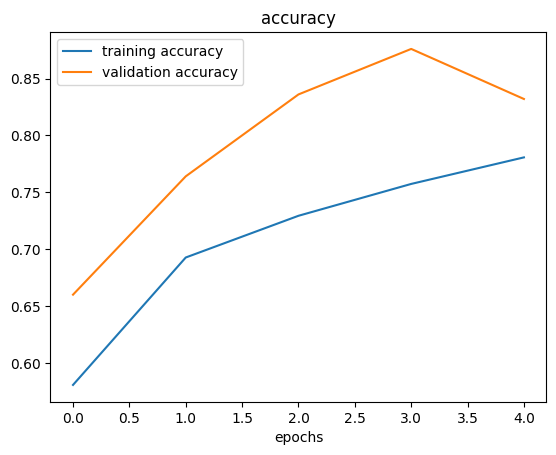

In [65]:
plot_loss_curves(history_7)

### Inference

(-0.5, 499.5, 374.5, -0.5)

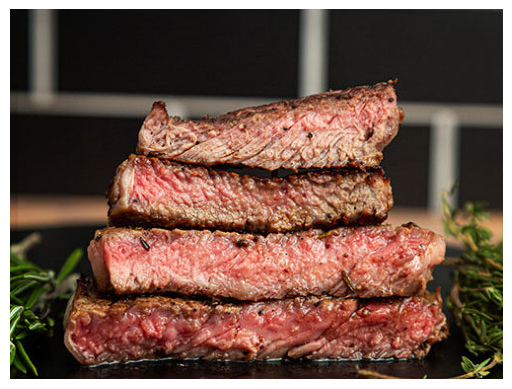

In [68]:
steak = mpimg.imread("../datasets/inference_img.jpg")
plt.imshow(steak)
plt.axis(False)